In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [17]:
import numpy as np
import pandas as pd
import gudhi as gh

import matplotlib.pyplot as plt
import networkx as nx

from src.depth import DepthPoset
from src.transpositions import Transposition
from src.drow import plot_filtred_complex2d, plot_simplex, enumerate_points

# Define the complex to test

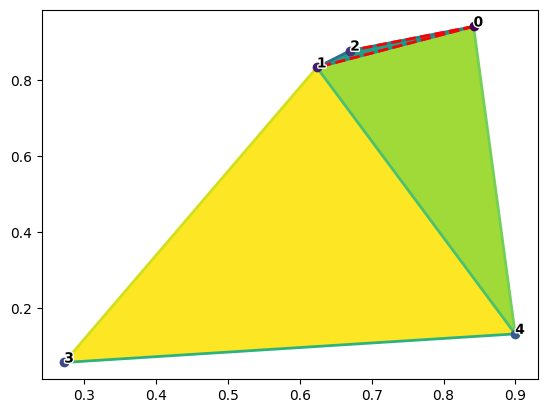

{'index 0': 6,
 'index 1': 7,
 'cell 0': (0, 2),
 'cell 1': (0, 1),
 'dim': 1,
 'type': 'birth-death',
 'switch': 'switch forward'}

In [3]:
points = np.random.random(size=[5, 2])

stree = gh.AlphaComplex(points).create_simplex_tree()
for i, (s, v) in list(enumerate(stree.get_filtration())):
    stree.assign_filtration(s, i)

plot_filtred_complex2d(stree, points, cmap='viridis')

order = [s for s, v in stree.get_filtration()]
dims = np.array([len(s) - 1 for s in order])
index0, index1 = np.random.choice(np.argwhere(dims[1:] == dims[:-1])[:, 0]) + np.arange(2)
cell0, cell1 = order[index0], order[index1]

plot_simplex(cell0, points, color='red', marker='*', linestyle='--', hatch='x')
plot_simplex(cell1, points, color='red', marker='*', linestyle='--', hatch='x')
enumerate_points(points, weight='semibold', forewidth=2)
plt.show()

transposition = Transposition.from_simplex_tree(stree, tuple(cell0), tuple(cell1))
transposition.to_dict()

/home/feodor/Jupyter/depth-poset/venv/lib/python3.12/site-packages/scipy/sparse/_index.py:201: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


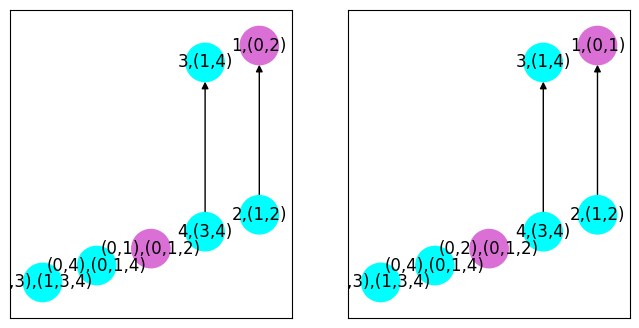

In [4]:
dp0 = transposition.dp
dp1 = transposition.next_depth_poset()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

node_colors0 = ['cyan' if node.source in [n.source for n in dp1.nodes] else 'orchid' for node in dp0.nodes]
node_colors1 = ['cyan' if node.source in [n.source for n in dp0.nodes] else 'orchid' for node in dp1.nodes]

pos0 = dp0.hasse_layout(alignment_slope=0.1)
pos1 = dp1.hasse_layout(alignment_slope=0.1)

nx.draw_networkx(dp0.get_transitive_reduction(), pos=pos0, node_color=node_colors0, node_size=760, ax=axs[0])
nx.draw_networkx(dp1.get_transitive_reduction(), pos=pos1, node_color=node_colors0, node_size=760, ax=axs[1])

xpos0 = np.array(list(pos0.values()))[:, 0]
xpos1 = np.array(list(pos1.values()))[:, 0]
ypos0 = np.array(list(pos0.values()))[:, 1]
ypos1 = np.array(list(pos1.values()))[:, 1]
axs[0].set_xlim(xpos0.min() - 0.15*(xpos0.max() - xpos0.min()), xpos0.max() + 0.15*(xpos0.max() - xpos0.min()))
axs[1].set_xlim(xpos1.min() - 0.15*(xpos1.max() - xpos1.min()), xpos1.max() + 0.15*(xpos1.max() - xpos1.min()))
axs[0].set_ylim(ypos0.min() - 0.15*(ypos0.max() - ypos0.min()), ypos0.max() + 0.15*(ypos0.max() - ypos0.min()))
axs[1].set_ylim(ypos1.min() - 0.15*(ypos1.max() - ypos1.min()), ypos1.max() + 0.15*(ypos1.max() - ypos1.min()))
plt.show()

In [18]:
pd.DataFrame({}, index=np.arange(10))

""
0
1
2
3
4
5
6
7
8
9
